In [1]:
import ultimate_sleuthbuilder as usb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a sampling distribution of mean chi-squared values
N = 32 # Sequence length
sample_size = 64 # Sample size
trials = 32 # Number of trials

expecations = usb.get_expected_counts(N)

mean_p_values = []
for trial in range(trials):
    # Generate a sample of n random sequences of length N
    sequences = [''.join(np.random.choice(['0', '1'], N)) for _ in range(sample_size)]
    p_values = []
    for seq in sequences:
        p = usb.analyze_sequence(seq)['p_value']
        p_values.append(p)
    mean_p_values.append(np.mean(p_values))

# Create a histogram of the mean chi-squared values
mean_p_values = np.array(mean_p_values)
sample_df = pd.DataFrame(mean_p_values, columns=['Mean P-value'])

# Save to csv
sample_df.to_csv('data/mean_p_values.csv', index=False)

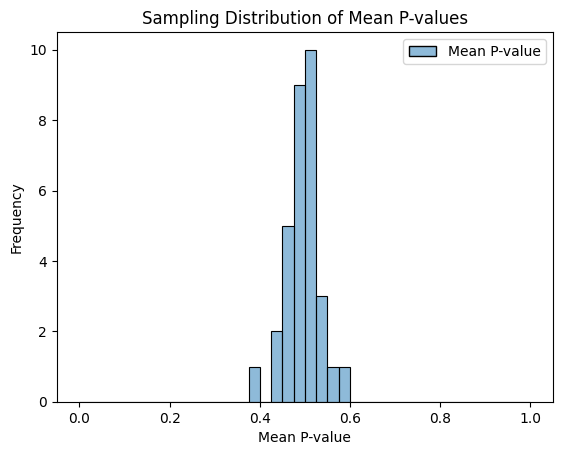

In [2]:
sns.histplot(sample_df, binrange=(0, 1), bins=40)
plt.title('Sampling Distribution of Mean P-values')
plt.xlabel('Mean P-value')
plt.ylabel('Frequency')
plt.show()